In [1]:
##################################################
# 1. keras 엔진을 활용하여 precision, recall 계산
##################################################

In [2]:
#http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255
#1. keras metrics로 precision,recall custom정의
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

Using TensorFlow backend.


In [3]:
#https://keras.io/examples/mnist_cnn/
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print('input_shape:', input_shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_cate = keras.utils.to_categorical(y_test, num_classes)

input_shape: (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', precision, recall, f1score])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_cate))

#score = model.evaluate(x_test, y_test_cate, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

_loss, _acc, _precision, _recall, _f1score = model.evaluate(x_test, y_test_cate, verbose=0)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.2703 - accuracy: 0.9172 - precision: 0.9370 - recall: 0.8908 - f1score: 0.9086 - val_loss: 0.0570 - val_accuracy: 0.9815 - val_precision: 0.9843 - val_recall: 0.9791 - val_f1score: 0.9817
Epoch 2/12
60000/60000 [==============================] - 3s 58us/step - loss: 0.0915 - accuracy: 0.9731 - precision: 0.9779 - recall: 0.9696 - f1score: 0.9737 - val_loss: 0.0438 - val_accuracy: 0.9857 - val_precision: 0.9883 - val_recall: 0.9838 - val_f1score: 0.9860
Epoch 3/12
60000/60000 [==============================] - 3s 58us/step - loss: 0.0680 - accuracy: 0.9801 - precision: 0.9829 - recall: 0.9776 - f1score: 0.9802 - val_loss: 0.0335 - val_accuracy: 0.9884 - val_precision: 0.9899 - val_recall: 0.9877 - val_f1score: 0.9888
Epoch 4/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0555 - accuracy: 0.9835 - precision: 0.9858 - recall: 0.9815 -

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
#수동검증
import numpy as np
print(x_test[0].shape)
print(np.array([x_test[0]]).shape)
pre_result =  model.predict(np.array([x_test[0]]))
print(np.argmax(pre_result, axis=-1))
print(y_test[0])

(28, 28, 1)
(1, 28, 28, 1)
[7]
7


In [18]:
#라벨별 건수(분포) 확인
import pandas as pd

print('y_test.shape:', y_test.shape)
df = pd.DataFrame({"num":y_test, "data":y_test})
print('df.shape:', df.shape)
#print(df)
print(df.groupby("num").count())

y_test.shape: (10000,)
df.shape: (10000, 2)
     data
num      
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009


In [ ]:
##############################################################
# 2. sklearn 패키지를 이용하여 precision, recall, roc/auc 확인
##############################################################

In [19]:
#https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/
#2-1. (binary class) sklearn 패키지로 좀더 친절하게 수치출력 및 표시
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

L_model = LogisticRegression().fit(X, y)
y_hat = L_model.predict(X)
f_value = L_model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

c_matrix = confusion_matrix(y, y_hat, labels=[1, 0])
print(c_matrix)
# 	          양성이라고 예측	                  음성이라고 예측
# 실제 양성 :	양성 예측이 맞음 (True Positive)	음성 예측이 틀림 (False Negative)
# 실제 음성 :	양성 예측이 틀림 (False Positive)	음성 예측이 맞음 (True Negative)

[[7 1]
 [1 7]]


In [21]:
def get_matrics_info(c_matrix):
    #recall = TP / (TP + FN)
    TP = c_matrix[0][0]
    FN = c_matrix[0][1]    
    FP = c_matrix[1][0]
    TN = c_matrix[1][1]
    print('TP:',TP, ' FN:', FN, ' ,FP:',FP, ' ,TN:', TN)

    recall= TP / (TP+FN)
    precision = TP /(TP+FP)
    fallout= FP / (FP+TN)    
    print('recall:',recall, ' ,precision:', precision, 'fallout:',fallout)
    
    return recall, precision, fallout

y.shape: (16,)
y: [0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1]
pre_y_dec.shape: (16,)
pre_y_dec: [ 0.37829565  1.6336573  -1.42938156  1.21967832  2.06504666 -4.11896895
 -1.04677034 -1.21469968  1.62496692 -0.43866584 -0.92693183 -0.76588836
  0.09428499  1.62617134 -2.08158634  2.36316277]

[0.    0.    0.    0.125 0.125 0.375 0.375 1.   ] [0.    0.125 0.75  0.75  0.875 0.875 1.    1.   ] [ 3.36316277  2.36316277  1.21967832  0.37829565  0.09428499 -0.76588836
 -0.92693183 -4.11896895]
TP: 7  FN: 1  ,FP: 1  ,TN: 7
recall: 0.875  ,precision: 0.875 fallout: 0.125


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

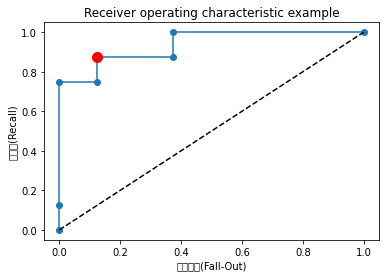

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def print_roc(y, pre_y, c_matrix):  
  fpr, tpr, thresholds = roc_curve(y, pre_y)
  print(fpr, tpr, thresholds)
  recall, precision, fallout = get_matrics_info(c_matrix)
  
  plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
  plt.plot([0, 1], [0, 1], 'k--', label="random guess")
  plt.plot([fallout], [recall], 'ro', ms=10)
  plt.xlabel('위양성률(Fall-Out)')
  plt.ylabel('재현률(Recall)')
  plt.title('Receiver operating characteristic example')
  plt.show()

  return fpr, tpr, recall, precision, fallout

print('y.shape:', y.shape)
print('y:', y)
pre_y_dec = L_model.decision_function(X)
print('pre_y_dec.shape:', pre_y_dec.shape)
print('pre_y_dec:', pre_y_dec)
print()

fpr, tpr, recall, precision, fallout = print_roc(y, pre_y_dec, c_matrix)

In [24]:
#모델이 여러개 있을때, AUC값이 1에 가까울수록  좋은 모형이다.
from sklearn.metrics import auc
print(auc(fpr, tpr))

0.9375


In [23]:
#2-2. (multi-class) 개별 class 값을 추출->2-1의 방식으로 개별환산
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
print('iris.target.shape:', iris.target.shape)
print('iris.target[0]:', iris.target[0])
y = label_binarize(iris.target, [0, 1, 2])

print('X.shape:', X.shape)
print('X[0]:', X[0])
print('y.shape:', y.shape)
print('y[0]:', y[0])
print('y[:, 2]:', y[:, 2])

iris.target.shape: (150,)
iris.target[0]: 0
X.shape: (150, 4)
X[0]: [5.1 3.5 1.4 0.2]
y.shape: (150, 3)
y[0]: [1 0 0]
y[:, 2]: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


i: 0  ,auc: 1.0
i: 1  ,auc: 0.9818
i: 2  ,auc: 0.989


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

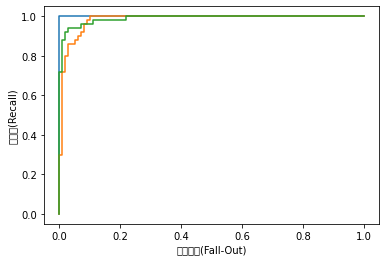

In [25]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model_G = GaussianNB().fit(X, y[:, i])
    pre_proba = model_G.predict_proba(X) #model_G.predict_proba(X)[:, 1] 
    pre_proba = pre_proba[:, 1] #[loss acc]
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], pre_proba)
    plt.plot(fpr[i], tpr[i])
    print('i:', i , ' ,auc:', auc(fpr[i], tpr[i]))

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [26]:
######################################
# MNIST결과를 ROC에 적용(multi-calls)
######################################
import numpy as np

label_bin = []
for idx in range(num_classes): #MNIST에서 정의한 class갯수(num_classes)
  label_bin.append(idx)
print('label_bin:', label_bin)

# #binary로 변환
y_bin = label_binarize(y_test, label_bin)
print('y_bin.shape:', y_bin.shape)
print('y_bin[0].shape:', y_bin[0].shape)
print('y_bin[:, 0].shape:', y_bin[:, 0].shape)
print('y_bin[0]:', y_bin[0])
print('y_bin[:, 0]:', y_bin[:, 0])
print('y_bin[:, 1]:', y_bin[:, 1])


label_bin: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_bin.shape: (10000, 10)
y_bin[0].shape: (10,)
y_bin[:, 0].shape: (10000,)
y_bin[0]: [0 0 0 0 0 0 0 1 0 0]
y_bin[:, 0]: [0 0 0 ... 0 0 0]
y_bin[:, 1]: [0 0 1 ... 0 0 0]


i: 0  ,auc: 0.4431841938549255
i: 1  ,auc: 0.9999845951633783
i: 2  ,auc: 0.5346183501718427
i: 3  ,auc: 0.3768658795801716
i: 4  ,auc: 0.5097571320359959
i: 5  ,auc: 0.3095032012462311
i: 6  ,auc: 0.4002159488612409
i: 7  ,auc: 0.7703154734747619
i: 8  ,auc: 0.24025414146947605
i: 9  ,auc: 0.32198793882529153


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

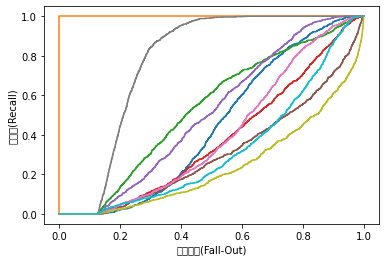

In [27]:
fpr = [None] * num_classes #MNIST 정의한 class갯수(num_classes)
tpr = [None] * num_classes
thr = [None] * num_classes

for i in range(num_classes):
    #fpr[i], tpr[i], thr[i] = roc_curve(y_bin[:, i], model.predict_proba(x_test)[:, 1])
    fpr[i], tpr[i], thr[i] = roc_curve(y_bin[:, i], model.predict(x_test)[:, 1])
    plt.plot(fpr[i], tpr[i])
    print('i:', i , ' ,auc:', auc(fpr[i], tpr[i]))    
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [ ]:
# https://analysis-flood.tistory.com/76
# precision/recall trade-off 그래프 그리기
# from sklearn.metrics import precision_recall_curve
# from sklearn.model_selection import cross_val_predict

# def plot_precision_recall_vs_threshold(precision, recall, threshlod):
#     plt.plot(threshlod, precision[:-1], "b--", label="Precision")
#     plt.plot(threshlod, recall[:-1], "g-", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="best")
#     plt.ylim([0, 1])
#     plt.show()

In [28]:
pre_y = np.argmax(model.predict(x_test), axis=-1)
result_dic = {}
for idx, pre_label in enumerate(pre_y):
    if y_test[idx] == pre_label : 
        if y_test[idx] not in result_dic:
            result_dic[y_test[idx]] = [1, 0]
        else:
            result = result_dic[y_test[idx]]
            result = [result[0]+1, result[1]] #정답인 경우 +1 저장
            result_dic[y_test[idx]] = result
    else:
        if y_test[idx] not in result_dic:
            result_dic[y_test[idx]] = [0, 1]
        else:
            result = result_dic[y_test[idx]]
            result = [result[0], result[1]+1] #오답인 경우 +1 저장
            result_dic[y_test[idx]] = result

for key in result_dic.keys():
    result = result_dic[key]
    print('key:', key, ' ,corr/err:', result_dic[key], ' ,per:', result[0]/(result[0]+result[1]))

key: 7  ,corr/err: [1014, 14]  ,per: 0.9863813229571985
key: 2  ,corr/err: [1027, 5]  ,per: 0.9951550387596899
key: 1  ,corr/err: [1133, 2]  ,per: 0.9982378854625551
key: 0  ,corr/err: [976, 4]  ,per: 0.9959183673469387
key: 4  ,corr/err: [971, 11]  ,per: 0.9887983706720977
key: 9  ,corr/err: [995, 14]  ,per: 0.9861248761149654
key: 5  ,corr/err: [883, 9]  ,per: 0.9899103139013453
key: 6  ,corr/err: [948, 10]  ,per: 0.9895615866388309
key: 3  ,corr/err: [1005, 5]  ,per: 0.995049504950495
key: 8  ,corr/err: [967, 7]  ,per: 0.9928131416837782


In [49]:
# #클래스별로 담아서 ROC 다시 구해보기

# data_dic = {} # [[label], [data]]
# for idx, num in enumerate(y_test):
#     if num not in data_dic:
#         data_dic[num] = [[num],[x_test[idx]]]
#     else: 
#         label_list = data_dic[num][0]
#         label_list.append(num)
#         data_list = data_dic[num][1]
#         data_list.append(x_test[idx])
#         data_dic[num] = [label_list, data_list]
# print('len(data_dic):', len(data_dic))

# for num in data_dic.keys():
#     data = data_dic[num]
#     print('len:', len(data[0]))

#     y_bin = label_binarize(data[0], label_bin)
#     #print('y_bin.shape:', y_bin.shape)
#     #print('np.array(data[1]).shape:', np.array(data[1]).shape)
#     #print('model.predict(np.array(data[1]))[:, 1].shape:',model.predict(np.array(data[1]))[:, 1].shape)
#     #print(y_bin[:, 0])
#     #fpr, tpr, thr = roc_curve(y_bin[:, num], model.predict(np.array(data[1]))[:, 1])
#     plt.plot(fpr, tpr)
#     print('num:', num , ' ,auc:', auc(fpr, tpr))  
#     #break
# plt.xlabel('위양성률(Fall-Out)')
# plt.ylabel('재현률(Recall)')
# plt.show()  